# Sampling Data in Python


## Basic Sampling

In [ ]:
# Take 10 rows as sample
pts_vs_flavor_samp = pts_vs_flavor_pop.sample(n=10)


### Sampling Bias
Convenience sampling—collecting data using the easiest method—can result in samples that aren't representative of the population.
Visualizing the distributions of the population and the sample can help determine whether or not the sample is representative of the population.


In [ ]:
# Visualize the hist of the whole dataset and a sample of the dataset
coffee_ratings_first10["total_cup_points"].hist(bins=np.arange(59,93, 2)) #! arange will stop at 91

### Pseudo-random number generation


In [ ]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5,scale=2, size=5000)

## Sampling Method
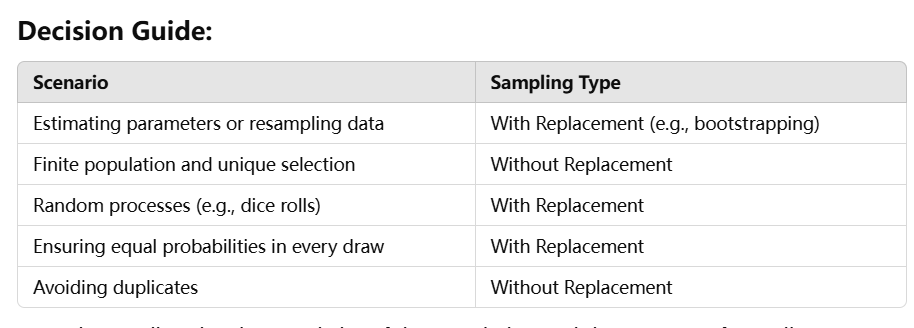

In [ ]:
# simple random sampling
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70,random_state=18900217)

# Systematic sampling
# Systematic sampling - defining the interval
sample_size = 5
pop_size = len(coffee_ratings)
interval = pop_size//sample_size
# Select rows
coffee_ratings.ilocl[::interval]
#! Systematic sampling is only safe if we don't see a pattern in the dataset scatter plot
## Add an index column
coffee_ratings_with_id = coffee_ratings.reset_index()
coffee_ratings_with_id.plot(x="index", y="aftertaste", kind="scatter")plt.show()
# How to make systematic sampling safe?
#* Shuffling rows + systematic sampling is the same as simple random sampling
shuffled =coffee_ratings.sample(frac=1)
shuffled =shuffled.reset_index(drop=True).reset_index()
shuffled.plot(x="index",y="aftertaste", kind="scatter")
plt.show()

## Stratified and weighted random sampling
**Stratified sampling**
Split the population into subgroups
Use simple random sampling on every subgroup

In [ ]:
# Proportional stratified sampling
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education').sample(frac=0.4, random_state=2022)

# Print the sample
print(attrition_strat)

In [ ]:
# Equal counts stratified sampling
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education')\
	.sample(n=30, random_state=2022)      

# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)

In [ ]:
# Weighted random sampling
#* Specify weights to adjust the relative probability of a row being sampled
# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

**Cluster sampling**
Use simple random sampling to pick some subgroups
Use simple random sampling on only those subgroups

In [ ]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())
# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)
# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]
# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby('JobRole').sample(n=10,random_state=2022)

## Sampling Distributions
quantify the accuracy of sample statistics using relative errors, and measure variation in estimates by generating sampling distributions
### Relative Error in point estimates
The size of the sample take affects how accurately the point estimates reflect the corresponding population parameter. For example, when calculate a sample mean, if want it to be close to the population mean. However, if sample is too small, this might not be the case.

The most common metric for assessing accuracy is "relative error". This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.

In [ ]:
# Relative Error in point estimates
# Calculate the relative error percentage
rel_error_pct50 = 100*abs(mean_attrition_srs50-mean_attrition_pop)/mean_attrition_pop

### sampling distribution
A sampling distribution is a distribution ofreplicates of point estimates.

As sample size increases, on average each sample mean has a lower relative error compared to the population mean, thus reducing the range of the distribution.

In [ ]:
#Generate 1000 means
mean_cup_points_1000 = []
for i in range(1000):
    mean_cup_points_1000.append(
        coffee_ratings.sample(n=30)['total_cup_points'].mean()
        )
print(mean_cup_points_1000)
# Plot the distibution of sample mean
import matplotlib.pyplot as plt
plt.hist(mean_cup_points_1000,bins=30)
plt.show()


### Approximate sampling distributions
The exact sampling distribution can only be calculated if you know what the population is and if the problems are small and simple enough to compute. Otherwise, the approximate sampling distribution must be used.

In [ ]:
# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1']+dice['die2']+dice['die3']+dice['die4']+dice['die5']+dice['die6']+dice['die7']+dice['die8'])/4               
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Print result
print(dice)
# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind='bar')
plt.show()

# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1, 9)), size=5, replace=True)
# Calculate the mean of five_rolls
mean_of_five_rolls = five_rolls.mean()
print(mean_of_five_rolls)

# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000,bins=20)
plt.show()

### Cental limit

In [ ]:
# Calculate the the mean attritions for each sampling distribution
sd_of_means_5 = np.mean(sampling_distribution_5)
# Calculate the std. dev. of the mean attritions for each sampling distribution
sd_of_means_5 = np.std(sampling_distribution_5,ddof=1)

## Bootstrap Distributions
Bootstrapping is, in some sense, the opposite of sampling from a population. Sampling treats your dataset as the population, and you generate a random subset. Bootstrapping treats your dataset as a sample and uses it to build up a theoretical population.

The bootstrapping workflow is to generate a resample of the same size as the population, calculate a summary statistic, then repeat this to get a distribution of summary statistics.

In [ ]:
#Resample with replacement
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)
# Calculate of the danceability column of spotify_1_resample
mean_danceability_1 = np.mean(spotify_1_resample['danceability'])
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)
# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()


Bootstrap distribution statistics can be used to estimate population parameters. 
If the sample is not closely representative of the population, then the mean of the bootstrap distribution will not be representative of the population mean. This is less of a problem for standard errors.

> When to use which mean?

The ``sampling distribution`` mean can be used to estimate the ``population mean``, but that is not the case with the bootstrap distribution.
bootstrap distribution Usually close to the **sample** mean

When you don't have all the values from the population or the ability to sample multiple times, you can use bootstrapping to get a good estimate of the **population standard deviation**.
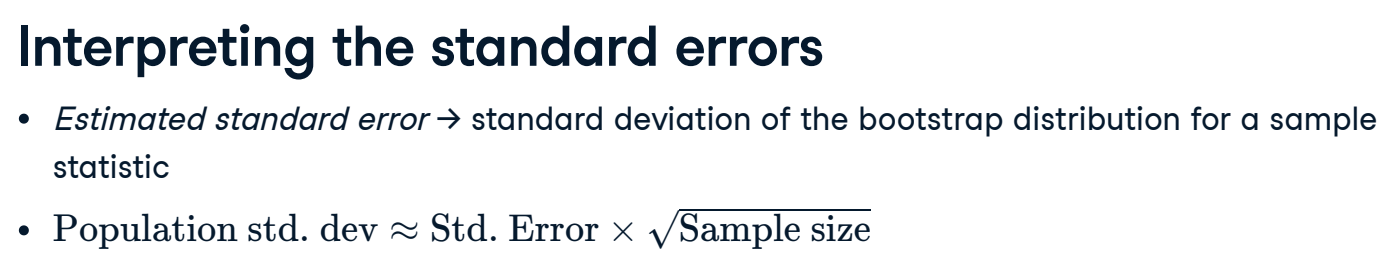

In [ ]:
# Calculate the population mean popularity
pop_mean = spotify_population['popularity'].mean()

# Calculate the original sample mean popularity
samp_mean = spotify_sample['popularity'].mean()

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(sampling_distribution)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(bootstrap_distribution)


In [ ]:
#! When ddof=0, the variance or standard deviation is calculated using the entire population
# Calculate the population std dev popularity
pop_sd = spotify_population['popularity'].std(ddof=0)

# Calculate the original sample std dev popularity
samp_sd = spotify_sample['popularity'].std(ddof=1)

# Calculate the sampling dist'n estimate of std dev popularity
samp_distn_sd = np.std(sampling_distribution,ddof=1)*np.sqrt(5000)

# Calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(bootstrap_distribution,ddof=1)*np.sqrt(5000)

# Print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])

## Confidence intervals
"Values within one standard deviation of the mean" includes a large number of values from each of these distributions

In [ ]:
#First Method of calculating CI -- Quantile method f
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(bootstrap_distribution, 0.025)
upper_quant = np.quantile(bootstrap_distribution,0.975)

# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(bootstrap_distribution)
standard_error = np.std(bootstrap_distribution,ddof=1)

# Second Method: -- Standard error method
# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025,loc=point_estimate,scale=standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(0.975,loc=point_estimate,scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))
